# NetworkX 

## Analyzing and Manipulating Networks in Python
 
Based on a [PyData Hamburg talk](https://github.com/crsqq/NetworkXpydata)

In this notebook we first review some  network science concepts and show how networks can be analyzed in Python. We will use the [NetworkX](https://networkx.org/documentation/stable/index.html) library which is written in Python and has a very accessible API. This tutorial self-contained - no previous knowledge of networks is assumed. Previous experience with Python or some other programming language is, however, helpful.

## What is a Network

<img style="float: right;" src="screenshots/graphExample.png" width="400">

__Network__: a pattern of interconnections among a set of things

__Node / Vertex__: The entity of analysis which has a relationship. Node is used in the network context, vertex is used in the graph theory context, but both terms are often used interchangeably.

__Link / Edge / Relationship__: The connections between the nodes. Link is used in the network context, edge is used in the graph theory context, and all words are used interchangably with *relationship*.

__Attributes__: Both nodes and edges can store attributes, which contain additional data about that object.

__Weight__: A common *attribute* of edges, used to indicate *strength* or *value* of a relationship.

__Degree__: Number of edges a node has.

A network is [unweighted/weighted] and [undirected/directed] and may contains parallel edges and / or self loops.

Many real-world phenomena can be modeled as networks. Most people think of social networks like facebook etc. if they hear the term network. The following table shows some examples from different domains to illustrate that the network concept is way more generic than 'just' social networks.

| Network               | Nodes                      | Edges                | Directionality |
|-----------------------|----------------------------|----------------------|----------------|
| Internet              | Routers                    | Internet connections | Undirected     |
| WWW                   | Webpages                   | Links                | Directed       |
| Power Grid            | Power plants, transformers | Cables               | Undirected     |
| Mobile-Phone Calls    | Subscribers                | Calls                | Directed       |
| Email                 | Email addresses            | Emails               | Directed       |
| Science Collaboration | Scientists                 | Co-authorships       | Undirected     |
| Actor Network         | Actors                     | Co-acting            | Undirected     |
| Citation Network      | Papers                     | Citations            | Directed       |
| E. Coli Metabolism    | Metabolites                | Chemical reactions   | Directed       |
| Protein Interactions  | Proteins                   | Binding interactions | Undirected     |

If your data is not 'tabular' but contains relationships / similarities between the observations, them you might want to build a network based on that data.. One of the most important steps in network analysis is coming up with meaningful network models, i.e. what the nodes and edges represent.

## Working with networks in Python

In this tutorial, we use the NetworkX library

    NetworkX is a Python package for the creation, manipulation,
    and study of the structure, dynamics, and functions of
    complex networks. (https://networkx.github.io/)
    
    
Some of its features:
* Data structures for graphs, digraphs, and multigraphs
* Many standard graph algorithms, network structure and analysis measures
* Nice API
* Open-Source

### Installation

Documentation (good): https://networkx.github.io/documentation/stable/

```
# installation
$ pip install networkx
```
.. or if you use conda
```
conda install -c anaconda networkx 
```
The stable release supports the most recent versions of Python.

## Creating networks


NetworkX is written in Python and has - in principle - no dependencies that need to be compiled. However, some features may require other packages (e.g.: matplotlib for plotting, numpy/scipy for faster computations).

In [65]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline
import warnings
warnings.filterwarnings("ignore") # hide MatplotlibDeprecationWarning

In [66]:
# helper function used to draw the networks
def draw_network(graph, seed=42):
    nx.draw(graph, pos=nx.spring_layout(graph, seed=seed),
            with_labels=True, node_size=1000)

The next few blocks show how network objects are created. Often strings or integers are used as nodes, but nodes can be arbitrary Python objects (..as long as those objects are hashable).

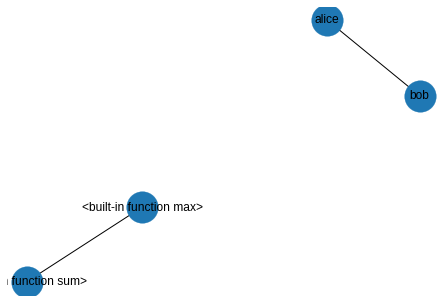

In [67]:
g = nx.Graph() # creates an empty network
g.add_node('alice'),g.add_node('bob')
g.add_edge('alice', 'bob')
g.add_node(sum), g.add_node(max) #hashable objects can be nodes
g.add_edge(sum, max)
draw_network(g, seed=9) #ignore seed

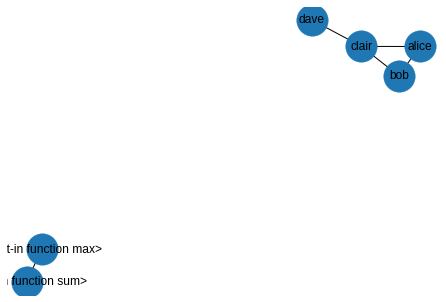

In [68]:
g.add_nodes_from(['clair', 'dave']) # multiple nodes can be added at one
g.add_edges_from([['bob', 'clair'], ['alice', 'clair'],  ['clair', 'dave']]) # same with edges

draw_network(g)

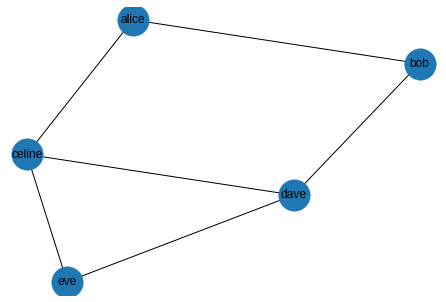

In [69]:
edges = [['alice', 'bob'], ['alice', 'celine'], ['celine', 'dave'],
         ['bob', 'dave'], ['dave', 'eve'], ['celine', 'eve']]
g = nx.from_edgelist(edges) # networks can be created from edgelist - without creating an empty network first
draw_network(g)

Graph classes in NetworkX: 
`nx.Graph`, `nx.DiGraph`, `nx.MultiGraph`, and `nx.MultiDiGraph` - the names as self-explanatory

Name: 
Type: DiGraph
Number of nodes: 5
Number of edges: 6
Average in degree:   1.2000
Average out degree:   1.2000


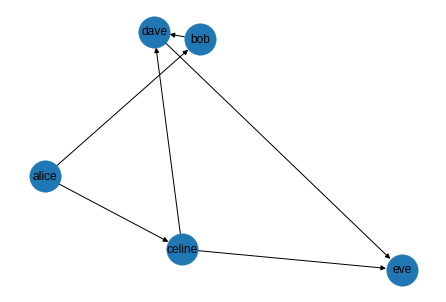

In [70]:
g = nx.from_edgelist(edges, create_using=nx.DiGraph) # network type might be passed to the constructor
draw_network(g) 
print(nx.info(g)) # this shows some statistics about the network and its type

In [71]:
g.is_directed()

True

NetworkX can read may popular graph formats, e.g.: gml, graphml, edgelist, adjlist, ..

In [72]:
!zcat house.edgelist.gz | head -n3

alice bob
alice celine
bob dave


In [73]:
g = nx.read_edgelist('house.edgelist.gz')
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 5
Number of edges: 6
Average degree:   2.4000


We can also use pandas DataFrames to create networks..

In [74]:
dfrm = pd.read_csv('house.csv')
dfrm.tail(2)

,source,target,intensity
4,celine,eve,3
5,dave,eve,1


The next few lines show how a network is created from a Pandas DataFrame and how node and edge attributes are accessed.

In [75]:
g = nx.from_pandas_edgelist(dfrm, source='source', target='target',
                            edge_attr='intensity')
g.graph['name'] = 'house'

In [76]:
print(nx.info(g))

Name: house
Type: Graph
Number of nodes: 5
Number of edges: 6
Average degree:   2.4000


In [77]:
g.edges(data=True)

EdgeDataView([('alice', 'bob', {'intensity': 1}), ('alice', 'celine', {'intensity': 1}), ('bob', 'dave', {'intensity': 2}), ('celine', 'dave', {'intensity': 2}), ('celine', 'eve', {'intensity': 3}), ('dave', 'eve', {'intensity': 1})])

In [78]:
g.edges[('celine', 'dave')] #edge attributes

{'intensity': 2}

In [79]:
g.nodes(data=True) # node attributes (actually, nodes in this network don't have any)

NodeDataView({'alice': {}, 'bob': {}, 'celine': {}, 'dave': {}, 'eve': {}})

![karate image](screenshots/karate.jpeg "karate image")

### Some network analysis - Zachary's karate club 
[Zachary's karate club](https://en.wikipedia.org/wiki/Zachary%27s_karate_club) is a well-known social network. The data was collected from the members of a university karate club by Wayne Zachary in 1977. Each node represents a member of the club, and each edge represents a tie between two members of the club. The network is undirected. An often discussed problem using this dataset is to find the two groups of people into which the karate club split after an argument between two teachers.

This network is included in NetworkX and we will now analyze it.

In [80]:
karate = nx.karate_club_graph()

Plotting the network is usually one of the first steps in a network analysis. However, visualizing the whole network only yields useful information if the network is not 'too' large. Luckily the karate club network is quiet manageable.

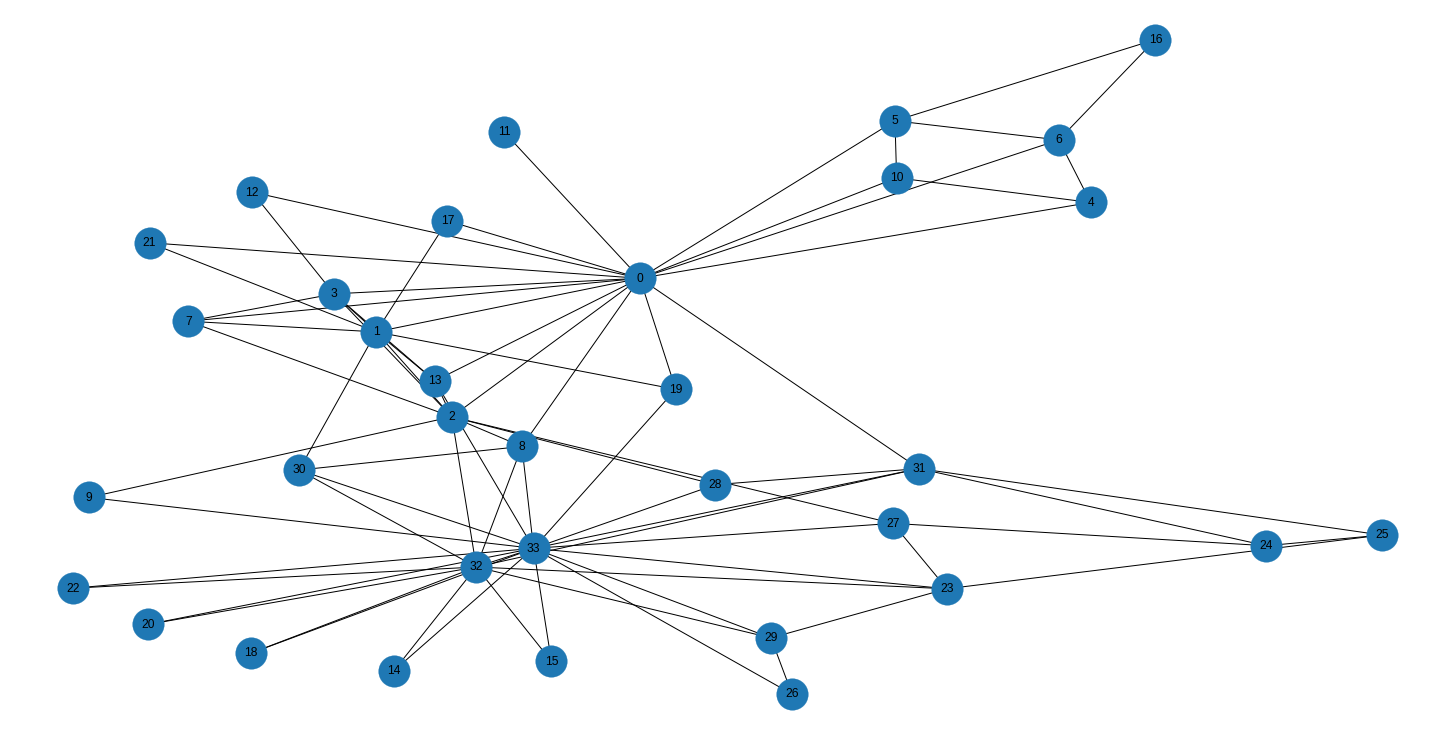

In [81]:
plt.figure(figsize=(20,10))
draw_network(karate)

For comparion, here is a plot with 500 nodes. From this plot you might infer that the degree distribution is skewed, but more information on the micro- and meso-scale level is barely visible.

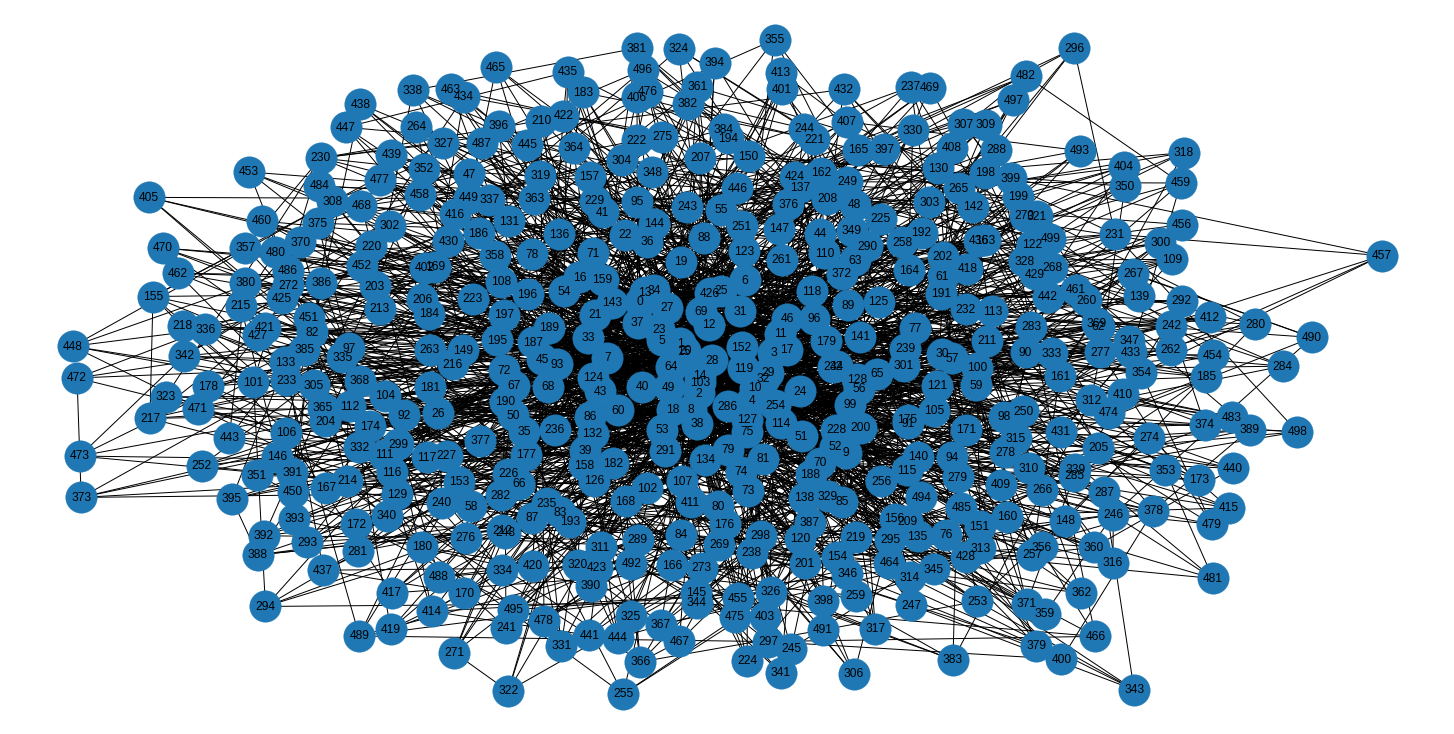

In [82]:
plt.figure(figsize=(20,10))
draw_network(nx.barabasi_albert_graph(500,5))

Lets return the to karate club network. Inspection this plot, we can see that there are thee highly connected nodes (0, 33, 32), while most of the node have few connections. We also get an idea about the community structure.

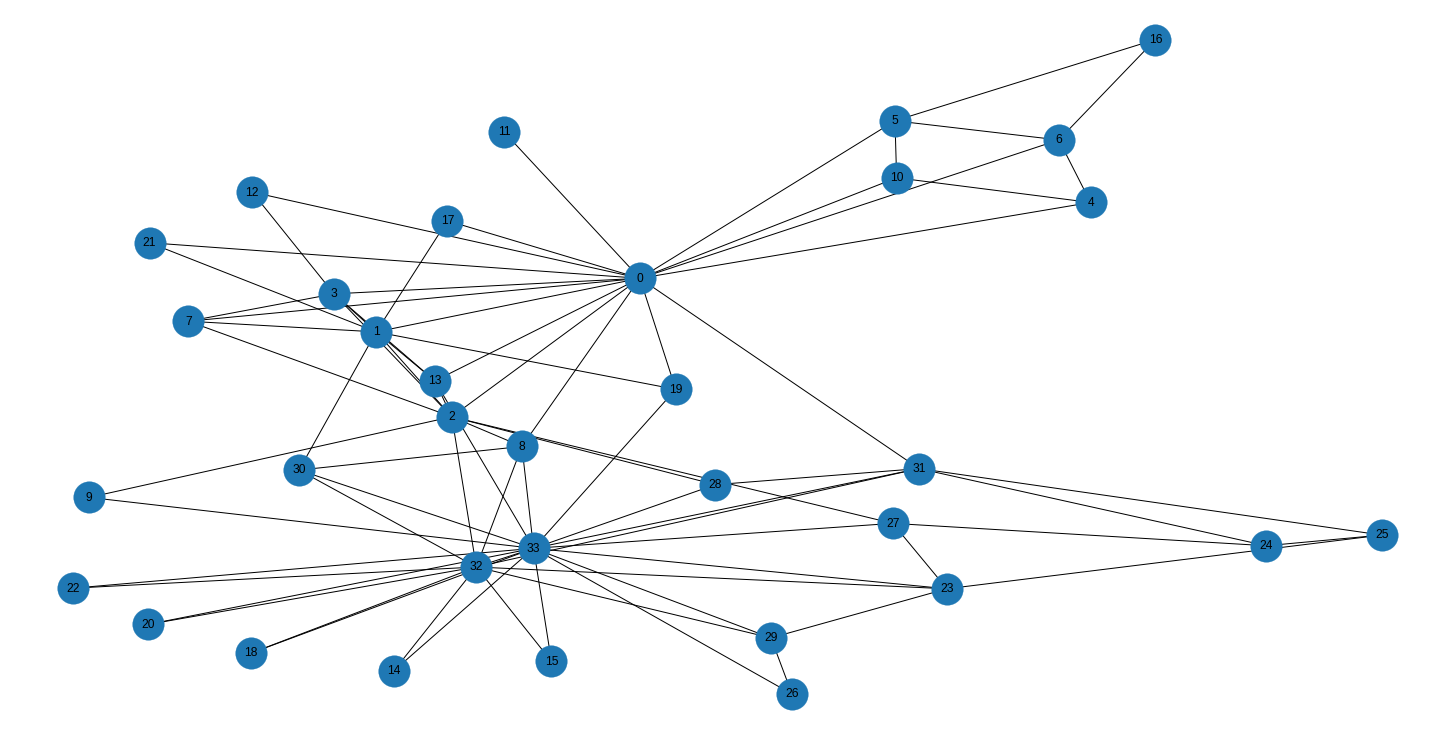

In [83]:
plt.figure(figsize=(20,10))
draw_network(karate)

The `nx.info` function givs us some summary statistics about the network..

In [84]:
print(nx.info(karate))

Name: Zachary's Karate Club
Type: Graph
Number of nodes: 34
Number of edges: 78
Average degree:   4.5882


.. which can also be calculated using dedicated functions:

In [85]:
karate.number_of_nodes(), karate.number_of_edges()

(34, 78)

The density of a graph is defined as a ratio of the number of edges to the number of possible edges in a graph.

In [86]:
nx.density(karate), 78 / (34*33/2)

(0.13903743315508021, 0.13903743315508021)

The diameter of a graph is the length of the longest shortest path in a graph.

In [87]:
nx.diameter(karate)

5

The degree of a node in a network is the number of connections it has to other nodes. 

In [88]:
nx.degree(karate)

DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

Looking at the degree distribution we can verify that most nodes but some have few connections.

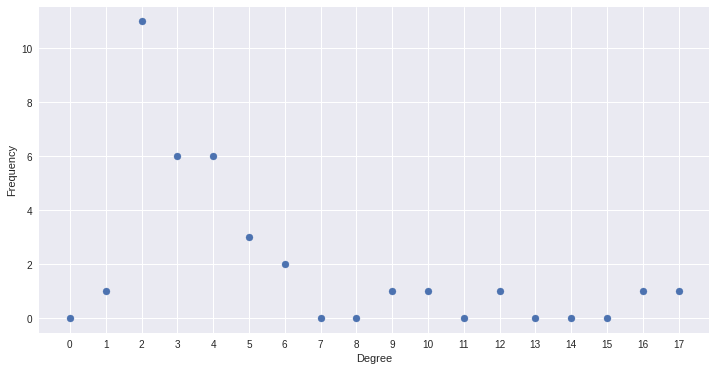

In [89]:
deg_hist = nx.degree_histogram(karate)
plt.figure(figsize=(12,6))
plt.scatter(np.arange(len(deg_hist)), deg_hist)
plt.xlabel('Degree'), plt.ylabel('Frequency')
_=plt.xticks(np.arange(len(deg_hist)))

In [90]:
nx.degree_assortativity_coefficient(karate) # high degree nodes tend to have connections to low degree nodes

-0.47561309768461457

Centrality measures map a real number to all nodes in a graph. They don't use attributes, they only rely on the graph structure. The centrality values are usually used to measure the 'importance' of individual nodes in a graph.

Examples
```
nx.degree_centrality,
nx.closeness_centrality,
nx.betweenness_centrality,
nx.pagerank
```

.. and many other available in the `nx.algorithms.centrality` module.

Usage: First argument is the graph.  Return value is a dict: key are the nodes, values are the centrality values for the corresponding node.

## Visualizing Networks
Lets add more information to the figures.

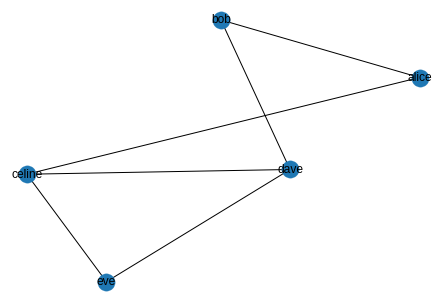

In [91]:
nx.draw(g, with_labels=True) #show the label of the nodes

Networkx offers a variety of layout algorithms, e.g.:
```
nx.layout.circular_layout
nx.layout.random_layout
nx.layout.fruchterman_reingold_layout # often useful
```

In [92]:
pos = nx.fruchterman_reingold_layout(g, seed=42)

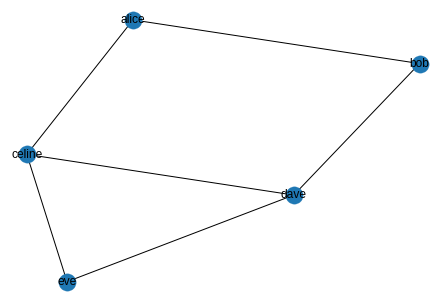

In [93]:
nx.draw(g, with_labels=True, pos=pos) # fix node position

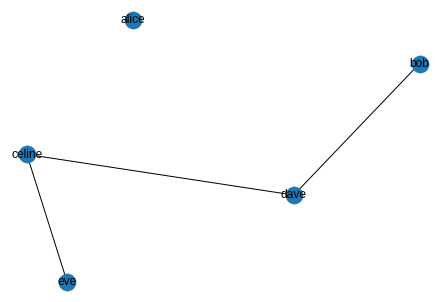

In [94]:
edgelist_high = [x for x in g.edges(data=True) if x[-1]['intensity'] > 1]
nx.draw(g, edgelist=edgelist_high, pos=pos, with_labels=True)

In [95]:
el = nx.get_edge_attributes(g, 'intensity')

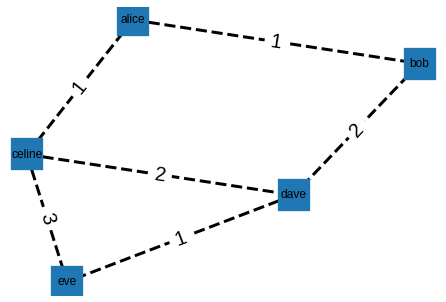

In [96]:
h_pos = nx.fruchterman_reingold_layout(g, seed=42)
nx.draw(g, pos=h_pos, with_labels=True, width=3, style='dashed', node_size=1000, node_shape='s')
_ = nx.draw_networkx_edge_labels(g, edge_labels=el, pos=h_pos, font_size=20)

In [97]:
club_colors = ['red' if v['club'] =="Mr. Hi" else 'lightblue' for k,v in karate.nodes(data=True)]

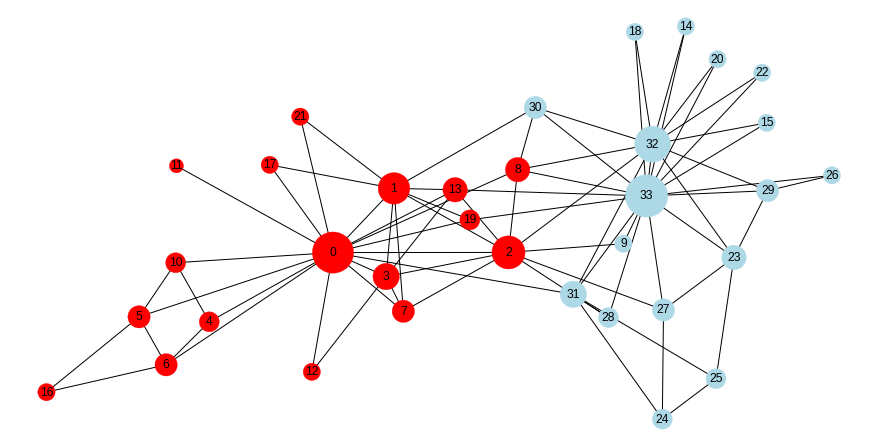

In [98]:
pos_kt = nx.layout.fruchterman_reingold_layout(karate, seed=1984)
pos_kt[33]-= np.array([0, 0.05])
plt.figure(figsize=(12,6))
dg = karate.degree()
dg = np.array([dg[n] for n in karate.nodes])
nx.draw(karate, node_color=club_colors, pos=pos_kt, with_labels=True, node_size=dg*100+100)

## Beyond NetworkX

NetworkX is a very versatile library but - especially for larger networks - the runtime of certain algorithms become prohibitively expensive. There exist a multitude of other (good) libraries, all of them have strengths and weaknesses. For example, the following are usually faster but have more complex dependencies or fewer features.

* graph-tool https://graph-tool.skewed.de/
* igraph http://igraph.org/python/
* NetworKit https://networkit.iti.kit.edu/

Two very good books about Network Science:
* Networks: An Introduction by Mark Newman
* Network Science by Albert-László Barabási (http://networksciencebook.com)

More Info about NetworkX
* NetworkX Documentation (https://networkx.github.io/documentation/stable)
* NetworkX Tutorial by RTI (https://github.com/rtidatascience/connected-nx-tutorial)

__Slides__
* https://github.com/crsqq/NetworkXpydata

__Contact__ 
* @crsqq